In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [3]:
df=pd.read_csv('./all_seasons.csv')

In [9]:
test_feat=['gp','net_rating']
df.loc[df.player_name=='Bruce Bowen', test_feat]

,gp,net_rating
163,1,300.0
769,61,0.4
882,30,-3.9
1513,69,3.0
1892,82,3.1
2502,59,11.3
2690,82,8.9
3342,82,8.7
3763,82,9.5
4215,82,8.7


In [10]:
(df.loc[(df['gp']==1)&(df['net_rating']>20)])

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
163,163,Bruce Bowen,MIA,26.0,200.66,90.718400,Cal State-Fullerton,USA,Undrafted,Undrafted,...,0.0,0.0,0.0,300.0,0.000,0.000,0.000,0.000,0.000,1996-97
1008,1008,Tyson Wheeler,DEN,23.0,177.80,74.842680,Rhode Island,USA,1998,2,...,4.0,0.0,2.0,62.2,0.000,0.000,0.320,1.064,0.667,1998-99
1687,1687,Mario Bennett,LAC,26.0,198.12,106.594120,Arizona State,USA,1995,1,...,0.0,2.0,0.0,32.7,0.143,0.250,0.276,0.000,0.000,1999-00
1725,1725,Randell Jackson,DAL,24.0,210.82,97.522280,Florida State,USA,1999,Undrafted,...,0.0,0.0,0.0,60.4,0.000,0.000,0.000,0.000,0.000,1999-00
1788,1788,David Wingate,SEA,37.0,195.58,84.821704,Georgetown,USA,1986,2,...,6.0,0.0,2.0,70.6,0.000,0.000,0.140,1.000,0.286,2000-01
2651,2651,Chris Owens,MEM,24.0,200.66,111.130040,Texas,USA,2002,2,...,4.0,1.0,0.0,39.1,0.333,0.000,0.288,0.667,0.000,2002-03
4226,4226,Bryon Russell,DEN,35.0,200.66,102.058200,Long Beach State,USA,1993,2,...,0.0,1.0,1.0,60.0,0.000,0.500,0.000,0.000,0.333,2005-06
4710,4710,Renaldo Major,GSW,25.0,200.66,86.182480,Fresno State,USA,Undrafted,Undrafted,...,5.0,2.0,0.0,21.5,0.000,0.091,0.171,0.230,0.000,2006-07
4733,4733,Von Wafer,LAC,21.0,195.58,95.254320,Florida State,USA,2005,2,...,0.0,0.0,0.0,26.6,0.000,0.000,0.275,0.000,0.000,2006-07
5738,5738,Steven Hill,OKC,23.0,213.36,111.130040,Arkansas,USA,Undrafted,Undrafted,...,2.0,3.0,0.0,79.0,0.400,0.500,0.101,1.000,0.000,2008-09


In [11]:
df.draft_year.unique()

array(['1986', '1990', '1979', '1995', '1985', '1981', '1994', '1992',
       '1991', 'Undrafted', '1983', '1988', '1996', '1993', '1989',
       '1987', '1982', '1984', '1980', '1976', '1978', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

<AxesSubplot:xlabel='draft_year'>

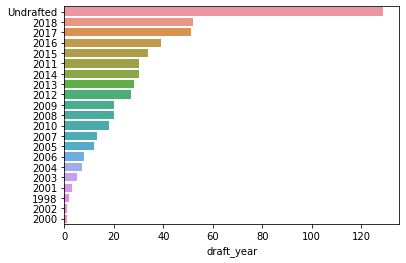

In [13]:
sns.barplot(y=df.loc[df.season=='2018-19'].draft_year.value_counts().index, x=df.loc[df.season=='2018-19'].draft_year.value_counts())

In [14]:
total_player=len(df.loc[df.season=='2018-19'].player_name.unique())

undrafted_player=len(df.loc[(df.season=='2018-19')&(df.draft_year=='Undrafted')].player_name.unique())

prcntg=100*(undrafted_player/total_player)

print(prcntg)

24.339622641509433


In [15]:
df.drop(df[df.draft_year<'1995'].index, inplace=True)

In [16]:
df['draft_number'].replace('Undrafted', '82', inplace=True)
df['draft_number'].replace('82', '61', inplace=True)
df['draft_number']=pd.to_numeric(df['draft_number'])

In [17]:
df_player=df[['player_name','gp']].groupby('player_name').sum().reset_index()
df_player=df_player.loc[df_player['gp']<5]
for p in df_player['player_name']:
    df.drop(df[df.player_name==p].index, inplace=True)

In [19]:
stats=['gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']
avg_per_pick=df.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_player=df.groupby(['player_name','draft_number'])[stats].mean().reset_index()

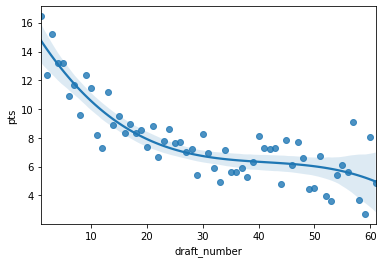

In [20]:
sns.regplot(x='draft_number', y='pts', data=avg_per_pick, order=3)
plt.show()

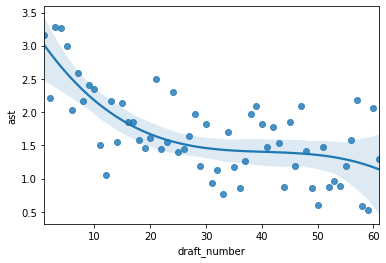

In [21]:
sns.regplot(x='draft_number', y='ast', data=avg_per_pick, order=3)
plt.show()

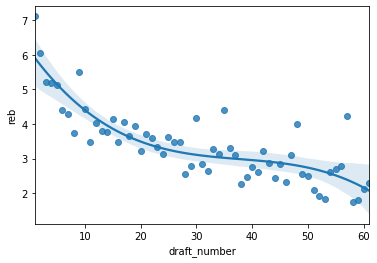

In [22]:
sns.regplot(x='draft_number', y='reb', data=avg_per_pick, order=3)
plt.show()

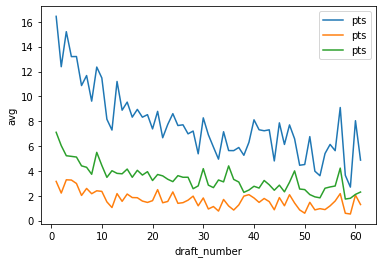

In [24]:
ax=sns.lineplot(x='draft_number', y='pts', data=avg_per_pick, label='pts')
ax=sns.lineplot(x='draft_number', y='ast', data=avg_per_pick, label='pts')
ax=sns.lineplot(x='draft_number', y='reb', data=avg_per_pick, label='pts')
ax.set(ylabel='avg')
ax.legend()
plt.show()

In [25]:
avg_per_pick[['draft_number', 'pts','ast','reb']][:15]

,draft_number,pts,ast,reb
0,1,16.445417,3.158333,7.110833
1,2,12.390541,2.219820,6.038739
2,3,15.210549,3.286920,5.224051
3,4,13.204167,3.267917,5.173750
4,5,13.210040,2.990763,5.118474
5,6,10.873054,2.026946,4.410180
6,7,11.679399,2.591416,4.293562
7,8,9.618932,2.166990,3.732039
8,9,12.362150,2.401869,5.496262
9,10,11.487391,2.355217,4.445652
